In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [86]:
df= pd.read_csv("NSE-TATAGLOBAL.csv")

In [87]:
df1=df.reset_index()['Close']

In [88]:
df1.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [89]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [90]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [91]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [92]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["columns_name", "percentage"])
NAN

,columns_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [93]:
srt = df.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [94]:
srt.reset_index(inplace=True)

In [95]:
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


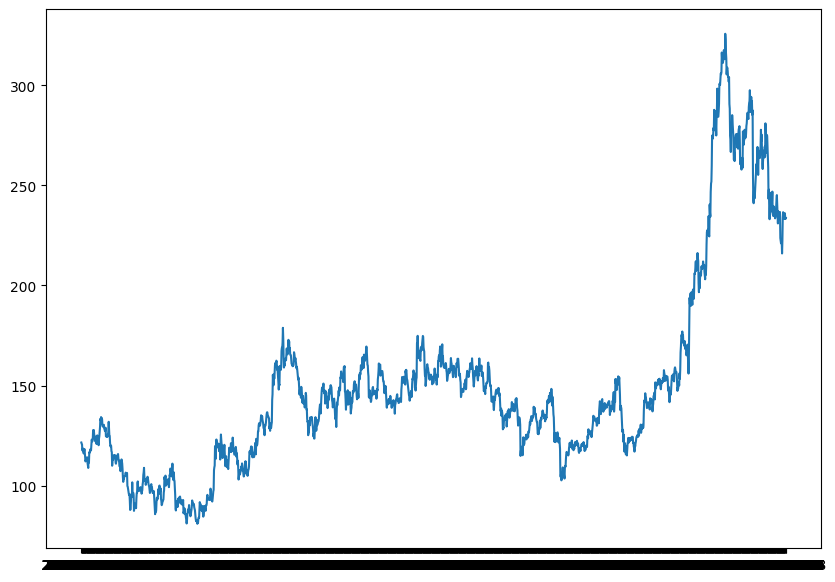

In [96]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [97]:
main = srt['Close']
main

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [98]:
scaler = MinMaxScaler(feature_range=(0,1))
main = scaler.fit_transform(np.array(main).reshape(-1,1))
main

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [99]:
train_size= int(len(main)*0.7)
test_size=len(main) - train_size
train_data,test_data = main[0:train_size,:],main[train_size:len(main),:1]

In [100]:
train_data.shape

(1424, 1)

In [101]:
test_data.shape

(611, 1)

In [102]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [103]:
time_step=100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data, time_step)

In [104]:
print(x_train.shape),print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [105]:
print(x_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [106]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [107]:
x_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.14011438],
        [0.13848039],
        [0.12479575]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.13848039],
        [0.12479575],
        [0.12254902]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.12479575],
        [0.12254902],
        [0.13010621]],

       ...,

       [[0.18280229],
        [0.19178922],
        [0.19219771],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.19178922],
        [0.19219771],
        [0.19281046],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.19219771],
        [0.19281046],
        [0.21058007],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [109]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [110]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 8s 164ms/step - loss: 0.0095 - val_loss: 0.0023
Epoch 2/60
19/19 [==============================] - 2s 108ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 3/60
19/19 [==============================] - 3s 138ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 3s 139ms/step - loss: 9.1044e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 3s 139ms/step - loss: 8.7899e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 3s 140ms/step - loss: 8.4984e-04 - val_loss: 0.0012
Epoch 7/60
19/19 [==============================] - 3s 139ms/step - loss: 8.0873e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 146ms/step - loss: 7.9015e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 3s 148ms/step - loss: 7.5312e-04 - val_loss: 0.0010
Epoch 10/60
19/19 [==============================] - 3s 141ms/step - loss: 7

In [112]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

16/16 [==============================] - 1s 33ms/step


In [113]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [114]:
import math
from sklearn.metrics import mean_squared_error

In [115]:
math.sqrt(mean_squared_error(y_train,train_predict))

131.04708471992188

In [116]:
math.sqrt(mean_squared_error(y_test,test_predict))

202.25394569491112

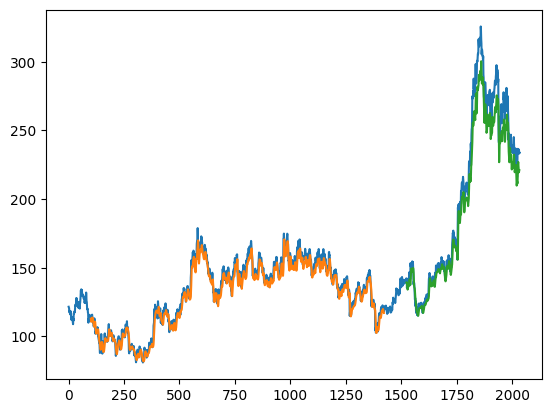

In [117]:
look_back=100
trainPredictPlot = np.empty_like(main)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(main)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(main))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [118]:
len(test_data)

611

In [119]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 100)

In [120]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [121]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [122]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        pred_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input = pred_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5727637]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [123]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

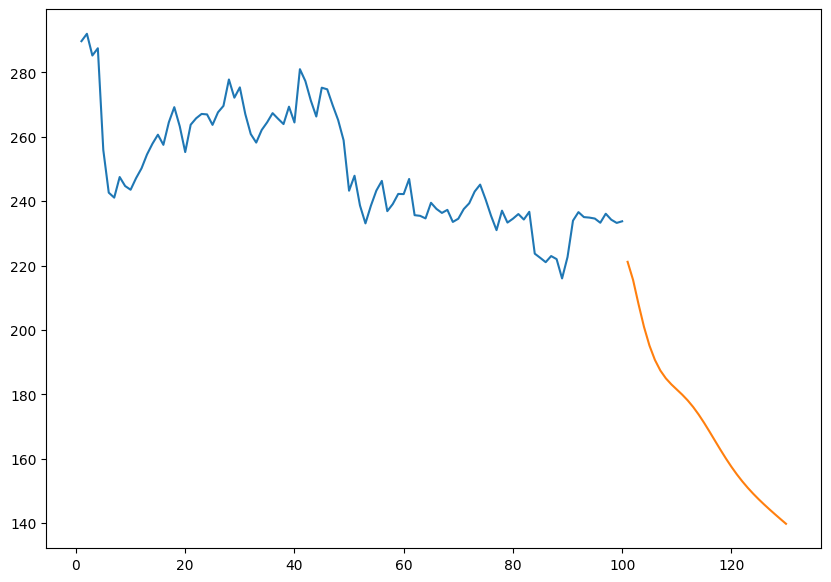

In [124]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(main[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

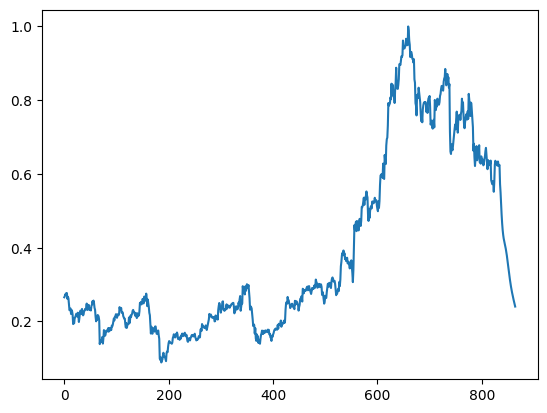

In [125]:
df3=main.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [126]:
df3=scaler.inverse_transform(df3).tolist()

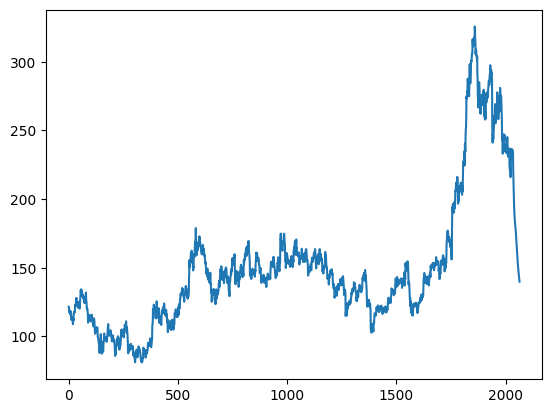

In [127]:
plt.plot(df3)